In [22]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import xgboost as xgb
print(xgb.__version__)

2.1.0


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, average_precision_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [25]:
df = pd.read_csv("D:/Swinburne/Sem 3/Innovation Project/Data Sciencne/fraudTrain.csv")   

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [26]:
#Display the data
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [27]:
#Summary the description of the dataset
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [28]:
#Distribute the class
df[('is_fraud')].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [33]:
#Split the column trans_date_trans_time into 2 separate columns, including trans_date and trans_time  ##TRAIN
#df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.date
#df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.time
#df.info()


# Split the 'trans_date_trans_time' into 'trans_date' and 'trans_time'
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.time
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## Pre-Processing

In [34]:
# Remove the 'trans_date_trans_time' column
# Check if the index column exists and remove it
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [35]:
# Reorder the columns to have 'trans_date' first and 'trans_time' second
columns = ['trans_date', 'trans_time'] + [col for col in df.columns if col not in ['trans_date', 'trans_time']]
df = df[columns]

From the dtype of the dataset, we still have some tasks to do with the dtype. First of all, trans_date needed to be transferred from object/string to datetime

In [42]:
# Convert 'dob' to datetime with the correct format
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')

# Convert 'trans_time' to time (already correctly formatted if in 'HH:MM:SS' format)
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.time

# Convert 'trans_date' to date (assuming the column is already in 'datetime' format, we can use .date() to extract the date part)
df['trans_date'] = pd.to_datetime(df['trans_date']).dt.date

# Check the data types
print("\nData types of the columns:")
print(df.dtypes)


Data types of the columns:
trans_date            object
trans_time            object
cc_num                 int64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object


In [37]:
df.dtypes

trans_date     object
trans_time     object
cc_num          int64
merchant       object
category       object
amt           float64
first          object
last           object
gender         object
street         object
city           object
state          object
zip             int64
lat           float64
long          float64
city_pop        int64
job            object
dob            object
trans_num      object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

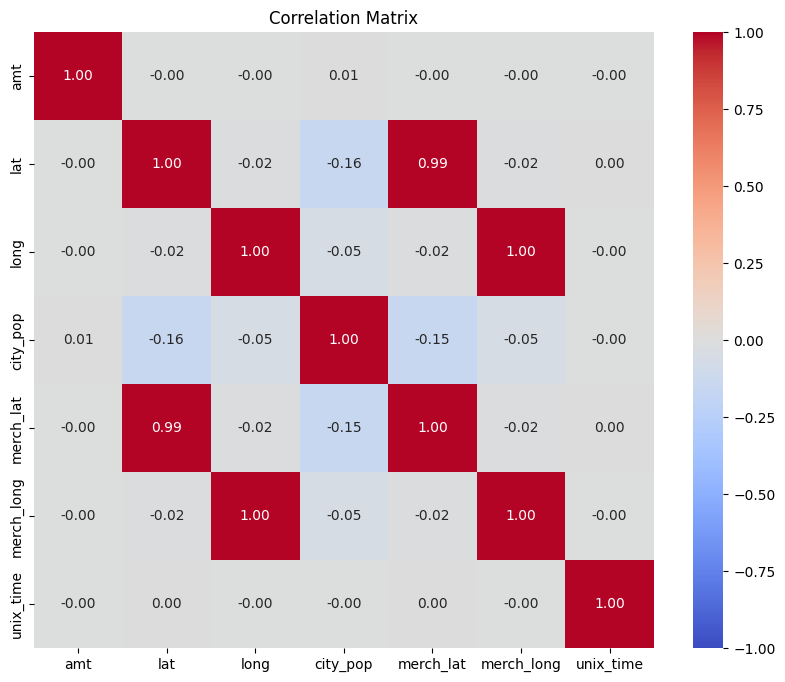

In [38]:
# Select numerical columns
numerical_columns_df = df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]
# Compute the correlation matrix
correlation_matrix = numerical_columns_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

1. Transaction Frequency Features

In [39]:
#Statistic summary of total transaction per user
df['cc_num'].value_counts().agg(['mean', 'median', 'min', 'max'])

mean      1319.099695
median    1054.000000
min          7.000000
max       3123.000000
Name: count, dtype: float64

In [44]:
# Ensure 'trans_date' is in datetime format and extract the date part
df['trans_date'] = pd.to_datetime(df['trans_date']).dt.date

# Total transactions of all users per day
df['transactions_per_day'] = df.groupby(['cc_num', 'trans_date'])['trans_date'].transform('count')

print(df[['cc_num', 'trans_date', 'transactions_per_day']].head())

             cc_num  trans_date  transactions_per_day
0  2703186189652095  2019-01-01                     3
1      630423337322  2019-01-01                    10
2    38859492057661  2019-01-01                     1
3  3534093764340240  2019-01-01                     2
4   375534208663984  2019-01-01                     4


In [46]:
# Ensure 'trans_date' is in datetime format
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Create a 'Week' column using ISO calendar weeks
df['Week'] = df['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
df['transaction_per_week'] = df.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

# Display the updated dataframe with Week and total transactions per Week for each customer
print(df[['cc_num', 'Week', 'transaction_per_week']].head())

             cc_num  Week  transaction_per_week
0  2703186189652095     1                    43
1      630423337322     1                    66
2    38859492057661     1                    11
3  3534093764340240     1                     8
4   375534208663984     1                    41


In [47]:
# Calculate total transactions per month for all users
total_transactions_per_month = df.groupby(df['trans_date'].dt.month).size()
# Display the total transactions per month
print(total_transactions_per_month)

trans_date
1     104727
2      97657
3     143789
4     134970
5     146875
6     143811
7      86596
8      87359
9      70652
10     68758
11     70421
12    141060
dtype: int64


In [48]:
# Total transactions of all users per day
df['transactions_per_month'] = df.groupby(['cc_num', df['trans_date'].dt.month])['trans_date'].transform('count')
print(df[['cc_num', 'trans_date', 'transactions_per_month']].head())

             cc_num trans_date  transactions_per_month
0  2703186189652095 2019-01-01                     177
1      630423337322 2019-01-01                     249
2    38859492057661 2019-01-01                      43
3  3534093764340240 2019-01-01                      35
4   375534208663984 2019-01-01                     170


In [49]:
#Transaction per season of all users
def season(date):
    if date.month in [1, 2, 3]:
        return 'Autumn'
    elif date.month in [4, 5, 6]:
        return 'Winter'
    elif date.month in [7, 8, 9]:
        return 'Spring'
    else:
        return 'Summer'
df['transactions_per_season'] = df.groupby(['cc_num', df['trans_date'].apply(season)])['trans_date'].transform('count')

2. User Transaction Behavior

In [50]:
## Perform the aggregations
agg_df = df.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge the aggregation results back to the original DataFrame
df = df.merge(agg_df, on='cc_num', how='left')

## 3. User-Based Features: Age and Gender

3.1 Calculate age of user based on DOB and transation date

In [51]:
#Calculate user's age based on date of birth and transaction date
def calculate_age(dob, trans_date):
    return trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))
df['age'] = df.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)

#Explore age stat
df['age'].agg(['mean', 'median', 'min', 'max'])

mean      45.496879
median    43.000000
min       13.000000
max       95.000000
Name: age, dtype: float64

3.2 Convert gender into binary values

In [52]:
#Convert gender to binary values
print('\n The number of cutomers based on age is:')
print(df['gender'].value_counts())
print("-" * 40)

#Total transaction amount by gender
print('\nTotal transaction amount made by gender is:')
print(df.groupby('gender')['amt'].sum())
print("-" * 40)

#Average transaction made by gender
print('\n Average transaction amount made by gender is:')
print(df.groupby('gender')['amt'].mean())
print("-" * 40)

# Calculate mean and median of age distribution by gender
print('\n Age Distribution by gender is:')
print(df.groupby('gender')['age'].agg(['mean', 'median']))
print("-" * 40)


 The number of cutomers based on age is:
gender
F    709863
M    586812
Name: count, dtype: int64
----------------------------------------

Total transaction amount made by gender is:
gender
F    49832612.83
M    41389816.07
Name: amt, dtype: float64
----------------------------------------

 Average transaction amount made by gender is:
gender
F    70.200324
M    70.533350
Name: amt, dtype: float64
----------------------------------------

 Age Distribution by gender is:
             mean  median
gender                   
F       45.401370    43.0
M       45.612414    44.0
----------------------------------------


## 4. Fraud Transaction Analysis

4.1 Calculate fraud ratio using fraudulent transactions and total transactions

In [53]:
# Calculate fraudulent transactions per user
fraud_transactions_per_user = df.groupby('cc_num')['is_fraud'].sum().reset_index()
total_transactions_per_user = df.groupby('cc_num').size().reset_index(name='total_transactions')

# Merge to get fraud ratio per user
fraud_ratio_per_user = pd.merge(fraud_transactions_per_user, total_transactions_per_user, on='cc_num')
fraud_ratio_per_user['fraud_ratio'] = fraud_ratio_per_user['is_fraud'] / fraud_ratio_per_user['total_transactions']

# Merge fraud_ratio into the original dataset
df = pd.merge(df, fraud_ratio_per_user[['cc_num', 'fraud_ratio']], on='cc_num', how='left')

## 5. Geography Analysis

5.1 Distance calculation using Haversine calculation

In [54]:
# Create the Haversine function using transaction longitude and latitude, also using merchant's longitude and latitude
def haversine(lat1, lon1, lat2, lon2):
    # Distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # Convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # Apply formula
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
         math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

df['distance_to_merch'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

5.2 Categorize type of cities based on the population

In [55]:
# Function to categorize city_pop
def categorize_population(population):
    if population < 1000:
        return 'Small'
    elif 1000 <= population <= 10000:
        return 'Medium'
    else:
        return 'Large'

# Apply the function to create a new column 'pop_category'
df['pop_cat'] = df['city_pop'].apply(categorize_population)

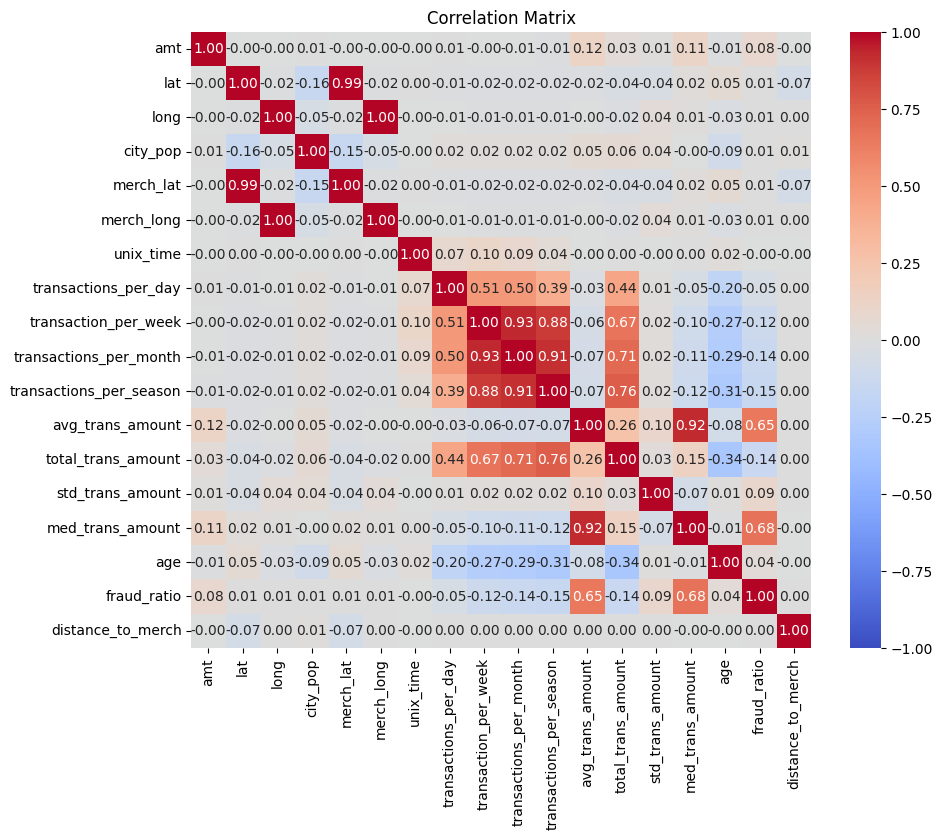

In [56]:
# Select numerical columns
numerical_columns_df = df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time', 'transactions_per_day', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season', 'avg_trans_amount', 'total_trans_amount', 'std_trans_amount', 'med_trans_amount', 'age', 'fraud_ratio', 'distance_to_merch']]
# Compute the correlation matrix
correlation_matrix = numerical_columns_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## 6. Feature Selection

6.1 Chi-Square Test for Categorical Feature Independence with Fraud

In [57]:
#List of categorical columns to test
categorical_cols = ['Week', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season', 'pop_cat']

# Loop through each categorical column and perform chi-square test
results = []
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['is_fraud'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append({'Feature': col, 'Chi2': chi2, 'P-value': p})

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
print("Chi-square test results for categorical features and is_fraud:\n", results_df)

Chi-square test results for categorical features and is_fraud:
                    Feature           Chi2        P-value
0                     Week     921.768273  4.292633e-160
1     transaction_per_week    1906.615198   0.000000e+00
2   transactions_per_month  124405.349893   0.000000e+00
3  transactions_per_season  135966.042786   0.000000e+00
4                  pop_cat       6.059791   4.832070e-02


6.2 Correlation Coefficient (Numerical Features)

In [58]:
# Compute Pearson correlation coefficient
correlation = df[['transactions_per_day', 'avg_trans_amount', 'total_trans_amount',
                  'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio',
                  'distance_to_merch', 'is_fraud']].corr()['is_fraud']

print("Pearson correlation coefficients:")
print(correlation)

Pearson correlation coefficients:
transactions_per_day    0.024684
avg_trans_amount        0.209960
total_trans_amount     -0.045929
med_trans_amount        0.216456
std_trans_amount        0.027645
age                     0.012248
fraud_ratio             0.320614
distance_to_merch       0.000403
is_fraud                1.000000
Name: is_fraud, dtype: float64


In [59]:
#Assuming df is your dataset with features and 'is_fraud' as the target
X = df[['transactions_per_day', 'avg_trans_amount', 'total_trans_amount',
        'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio',
        'distance_to_merch']]
y = df['is_fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selected_features = []  # Initialize an empty list to store selected features
accuracies = []          # Initialize an empty list to store accuracies

# Start a loop to select features one by one until all features are selected
while len(selected_features) < len(X.columns):
    max_acc = -1         # Initialize maximum accuracy to a very low value
    best_feature = None  # Initialize variable to store the best feature

    # Iterate through each feature in X.columns
    for feature in X.columns:
        if feature not in selected_features:  # Check if the feature is not already selected
            current_features = selected_features + [feature]  # Add the feature to the current selected features
            X_train_subset = X_train[current_features]       # Subset the training data with current features
            X_test_subset = X_test[current_features]         # Subset the testing data with current features

            # Initialize and train a logistic regression model
            clf = LogisticRegression(max_iter=1000, random_state=42)
            clf.fit(X_train_subset, y_train)
            y_pred = clf.predict(X_test_subset)  # Make predictions on the test data

            accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy of predictions

            # Check if current accuracy is better than previous maximum accuracy
            if accuracy > max_acc:
                max_acc = accuracy  # Update maximum accuracy
                best_feature = feature  # Update best feature

    # If adding the best feature improves accuracy, add it to selected features and record accuracy
    if max_acc > max(accuracies, default=0):
        selected_features.append(best_feature)
        accuracies.append(max_acc)
    else:
        break  # Exit the loop if no improvement in accuracy

# Print selected features and their corresponding accuracies
print("Selected Features:", selected_features)
print("Accuracies:", accuracies)

Selected Features: ['fraud_ratio']
Accuracies: [0.9946902654867257]


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df is your dataset with features and 'is_fraud' as the target
# Replace df with your actual dataset
X = df[['transactions_per_day', 'avg_trans_amount', 'total_trans_amount',
        'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio',
        'distance_to_merch']]
y = df['is_fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selected_features = list(X.columns)
accuracies = []

while len(selected_features) > 0:
    max_acc = -1
    worst_feature = None

    for feature in selected_features:
        current_features = [f for f in selected_features if f != feature]
        X_train_subset = X_train[current_features]
        X_test_subset = X_test[current_features]

        clf = LogisticRegression(max_iter=1000, random_state=42)
        clf.fit(X_train_subset, y_train)
        y_pred = clf.predict(X_test_subset)

        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > max_acc:
            max_acc = accuracy
            worst_feature = feature

    if max_acc > max(accuracies, default=0):
        selected_features.remove(worst_feature)
        accuracies.append(max_acc)
    else:
        break

print("Selected Features:", selected_features)
print("Accuracies:", accuracies)

Selected Features: ['avg_trans_amount', 'total_trans_amount', 'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio', 'distance_to_merch']
Accuracies: [0.9946825534540267]


7. Resampling dataset

In [61]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables into numerical values
df['merchant'] = label_encoder.fit_transform(df['merchant'])
df['category'] = label_encoder.fit_transform(df['category'])
df['city'] = label_encoder.fit_transform(df['city'])
df['state'] = label_encoder.fit_transform(df['state'])
df['pop_cat'] = label_encoder.fit_transform(df['pop_cat'])

In [62]:
# Drop irrelevant or personally identifiable information (PII) columns
df = df.drop(columns=["first", "last", "street", "trans_num", "dob", "trans_date", "trans_time", "job"])

# Apply the mapping to convert 'gender' column to numerical values
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

is_fraud
0    7506
1    7506
Name: count, dtype: int64


<Axes: xlabel='is_fraud', ylabel='count'>

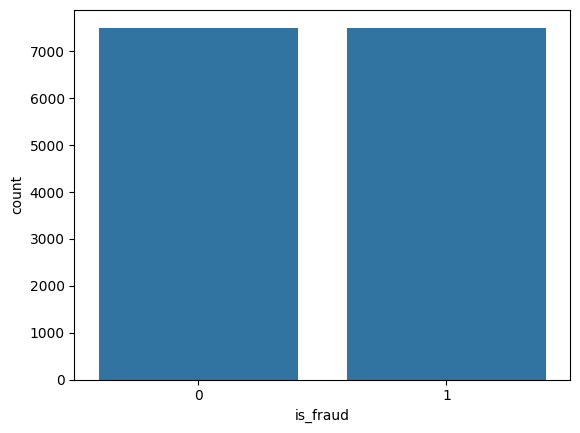

In [63]:
# Step 3: Split the data into features (X) and target (y)
X = df.drop(columns=['is_fraud'])  # Replace 'is_fraud' with your target column name if different
y = df['is_fraud']  # Replace 'is_fraud' with your target column name if different

# Step 4: Apply RandomUnderSampler to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

# Create the new dataset df_under from the resampled data
df_under = pd.DataFrame(X_under, columns=X.columns)
df_under['is_fraud'] = y_under

# Check the balance of the resampled data
print(y_under.value_counts())
sns.countplot(x=y_under)

In [64]:
#Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_under.drop(columns=['is_fraud']), df_under['is_fraud'], test_size=0.2, random_state=42)

# Step 6: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
#Train the Logistic Regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train_scaled, y_train)

#Print the score of the model on the test set
print("\nLogistic Regression Classifier Model")
print("Model accuracy:", logreg_classifier.score(X_test_scaled, y_test))

#Predict on the test set
y_pred = logreg_classifier.predict(X_test_scaled)

#Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Logistic Regression Classifier Model
Model accuracy: 0.8661338661338661

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1507
           1       0.92      0.80      0.86      1496

    accuracy                           0.87      3003
   macro avg       0.87      0.87      0.87      3003
weighted avg       0.87      0.87      0.87      3003


Confusion Matrix:
[[1410   97]
 [ 305 1191]]


In [66]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_scaled, y_train)

# Print the score of the model on the test set
print("\nXGBoost Classifier Model")
print("Model accuracy:", xgb_classifier.score(X_test_scaled, y_test))

# Predict on the test set
y_pred = xgb_classifier.predict(X_test_scaled)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


XGBoost Classifier Model
Model accuracy: 0.9746919746919747

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1507
           1       0.97      0.98      0.97      1496

    accuracy                           0.97      3003
   macro avg       0.97      0.97      0.97      3003
weighted avg       0.97      0.97      0.97      3003


Confusion Matrix:
[[1464   43]
 [  33 1463]]



Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

XGBoost Classifier with RandomizedSearchCV
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1507
           1       0.97      0.98      0.98      1496

    accuracy                           0.98      3003
   macro avg       0.98      0.98      0.98      3003
weighted avg       0.98      0.98      0.98      3003


Confusion Matrix:
[[1469   38]
 [  33 1463]]


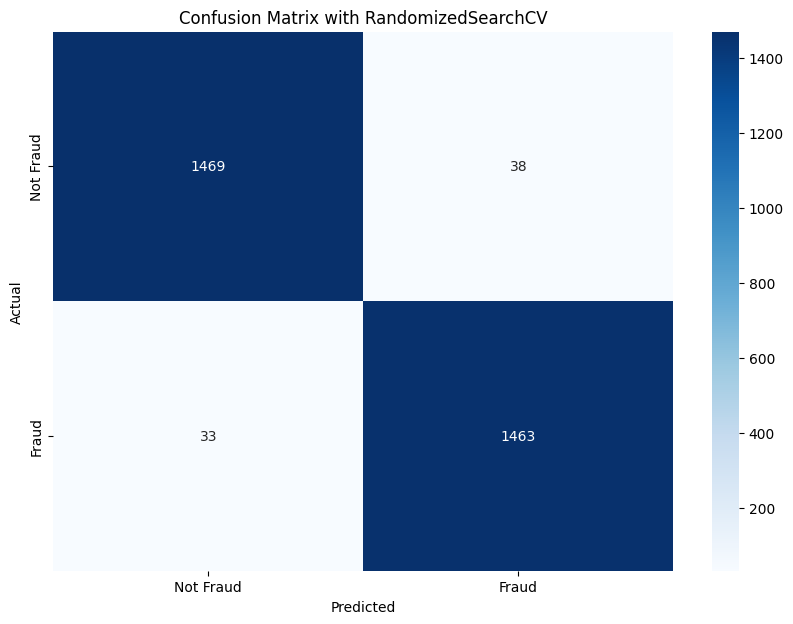


Model accuracy with RandomizedSearchCV: 0.9763569763569764

Cross-Validation Accuracy Scores: [0.98293089 0.97960033 0.97626978 0.98126561 0.97542691]
Mean Cross-Validation Accuracy: 0.9790987033226857


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already split your dataset and performed preprocessing
# X_train_scaled, X_test_scaled, y_train, y_test

# Train the XGBoost classifier with RandomizedSearchCV
xgb_classifier_tuned = XGBClassifier(random_state=42)

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(xgb_classifier_tuned, param_distributions=param_dist, n_iter=50, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("\nBest Parameters:", random_search.best_params_)

# Predict on the test set using the best estimator
best_xgb = random_search.best_estimator_
y_pred_tuned = best_xgb.predict(X_test_scaled)

# Print the classification report
print("\nXGBoost Classifier with RandomizedSearchCV")
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned))

# Calculate and print the confusion matrix
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix:")
print(conf_matrix_tuned)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with RandomizedSearchCV')
plt.show()

# Print the accuracy of the model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("\nModel accuracy with RandomizedSearchCV:", accuracy_tuned)

# Perform Cross-Validation with the best estimator from RandomizedSearchCV
cv_scores = cross_val_score(best_xgb, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

## RandmisedSearchCV used with XGBoost Model and with Stratified K-Fold cross-validation approach

In [69]:
import joblib

Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1507
           1       0.98      0.98      0.98      1496

    accuracy                           0.98      3003
   macro avg       0.98      0.98      0.98      3003
weighted avg       0.98      0.98      0.98      3003


Confusion Matrix:
[[1470   37]
 [  35 1461]]


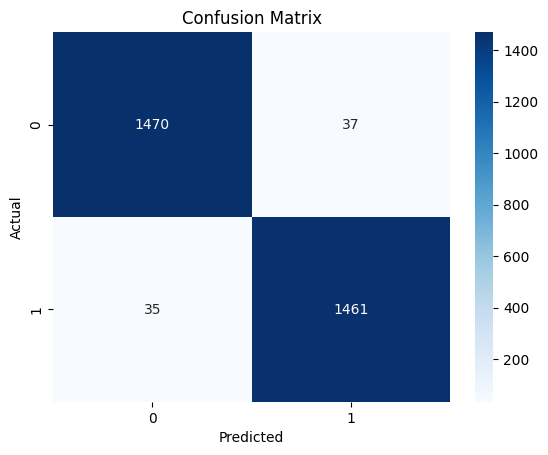

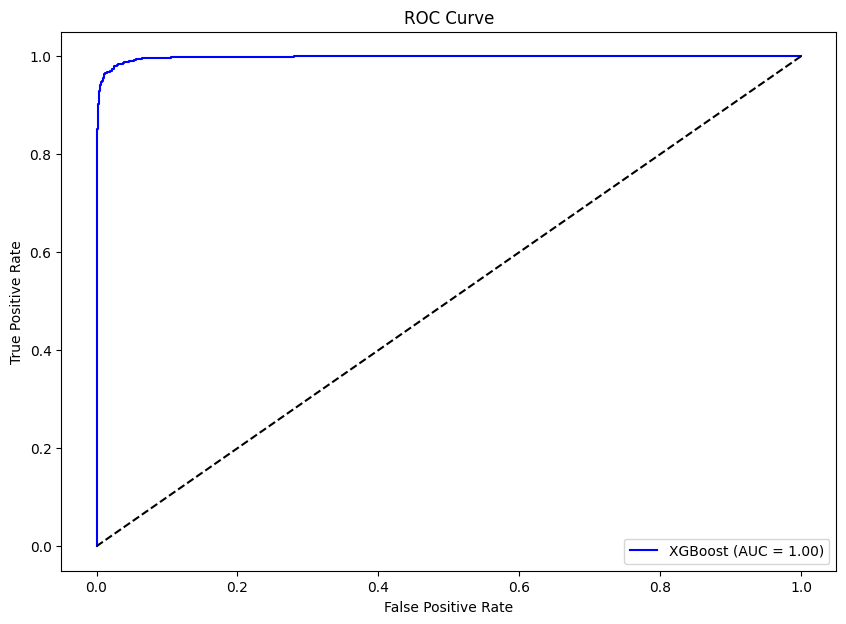

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Assuming df_under is your preprocessed and resampled dataset with features and 'is_fraud' as the target

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_under.drop(columns=['is_fraud']), df_under['is_fraud'], test_size=0.2, random_state=42)

# Step 6: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost with RandomizedSearchCV and Stratified K-Fold Cross-Validation
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Stratified K-Fold Cross-Validation to ensure balanced class distribution
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, n_iter=50, cv=cv, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_xgb = random_search.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test_scaled)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
y_pred_prob = best_xgb.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [71]:
# Save the model using JobLib
joblib.dump(best_xgb, 'best_xgb_model.pkl')
print("Model saved as best_xgb_model.pkl")

Model saved as best_xgb_model.pkl
